# Data Analysis with Python:Coursera


First we import necessary libraries then our csv for analysis:

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\kaout\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [73]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
pd.set_option('display.max_columns', 22)
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


i used df instead of df.head() to show also the shape of our csv(21613 rows, 22columns)
df.describe() diplay a statistical summary of the dataframe
we notice from count that there are some missing values in the columns bedrooms and bathrooms,we will deal with them in the next:

In [151]:
np.round(df.describe(),2)

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00,2.161300e+04,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,10806.00,4.580302e+09,540088.14,3.37,2.12,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46
std,6239.28,2.876566e+09,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18
min,0.00,1.000102e+06,75000.00,1.00,0.50,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,5403.00,2.123049e+09,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,10806.00,3.904930e+09,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,16209.00,7.308900e+09,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,21612.00,9.900000e+09,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


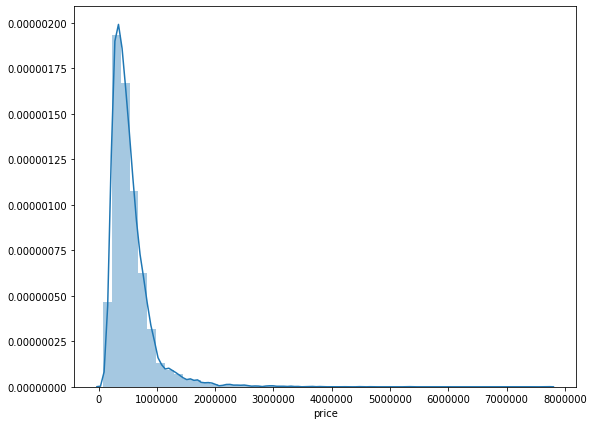

In [160]:
plt.figure(figsize=(9,7))
sns.distplot(df['price'])
plt.show()

## Data preprocessing:

we'll drop Unnamed: 0 column because it contains index of the dataframe and id column because it give no useful information 

In [165]:
df.drop(["Unnamed: 0","id"],axis=1,inplace=True)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


Let's deal with missing values now:

In [74]:
#To know which column contains missing values:
df.isnull().any()


Unnamed: 0       False
id               False
date             False
price            False
bedrooms          True
bathrooms         True
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [75]:
#Another method for knowing the total of missing values in our dataframe:
df.isnull().sum().sum()

23

In [64]:
#how much missing value in the bedroom column
df['bedrooms'].isnull().sum()

13

In [65]:
df['bathrooms'].isnull().sum()
#we have 10 missing value in the column bathrooms

10

In [67]:
df['bedrooms'].unique()

array([ 3.,  2.,  4.,  5.,  1.,  6.,  7., nan,  8.,  9., 11., 10., 33.])

In [68]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75,  nan, 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [164]:
#we'll replace the missing values with the mean using replace method

df['bedrooms'].replace(np.nan,df['bedrooms'].mean(), inplace=True)
df['bathrooms'].replace(np.nan,df['bathrooms'].mean(), inplace=True)


In [78]:
#check if we still have missing values:
df['bedrooms'].unique()

array([ 3.        ,  2.        ,  4.        ,  5.        ,  1.        ,
        6.        ,  7.        ,  3.37287037,  8.        ,  9.        ,
       11.        , 10.        , 33.        ])

In [80]:
#Another way to check:

print("Total missing values in bathrooms column :",df['bathrooms'].isnull().sum())

Total missing values in bathrooms column : 0


## Exploratory data analysis:

In [82]:
#to check floors values in the csv:
df['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [84]:
#to count the number of houses with unique floor values
df['floors'].value_counts().to_frame()

,floors
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


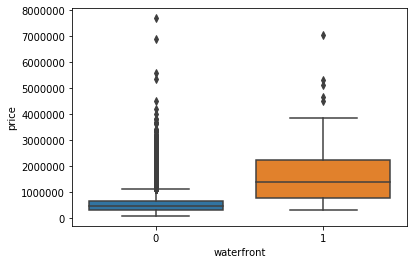

In [86]:
#to determine whether houses with a waterfront view or not have more price outliers:
sns.boxplot(x= "waterfront", y= "price", data = df)


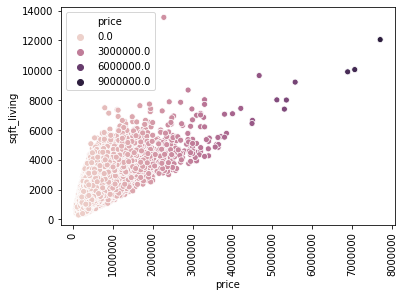

In [162]:
sns.scatterplot(x='price',y='sqft_living',hue='price',data=df)
plt.xticks(rotation=90)
plt.show()

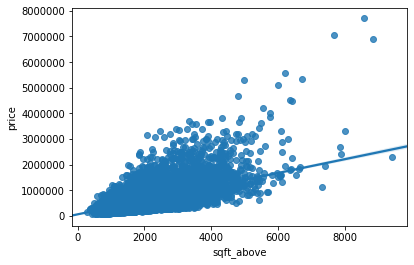

In [88]:
#to determine if the feature sqft_above is negatively or positively correlated with price
sns.regplot(x= "sqft_above", y= "price", data = df)
plt.show()

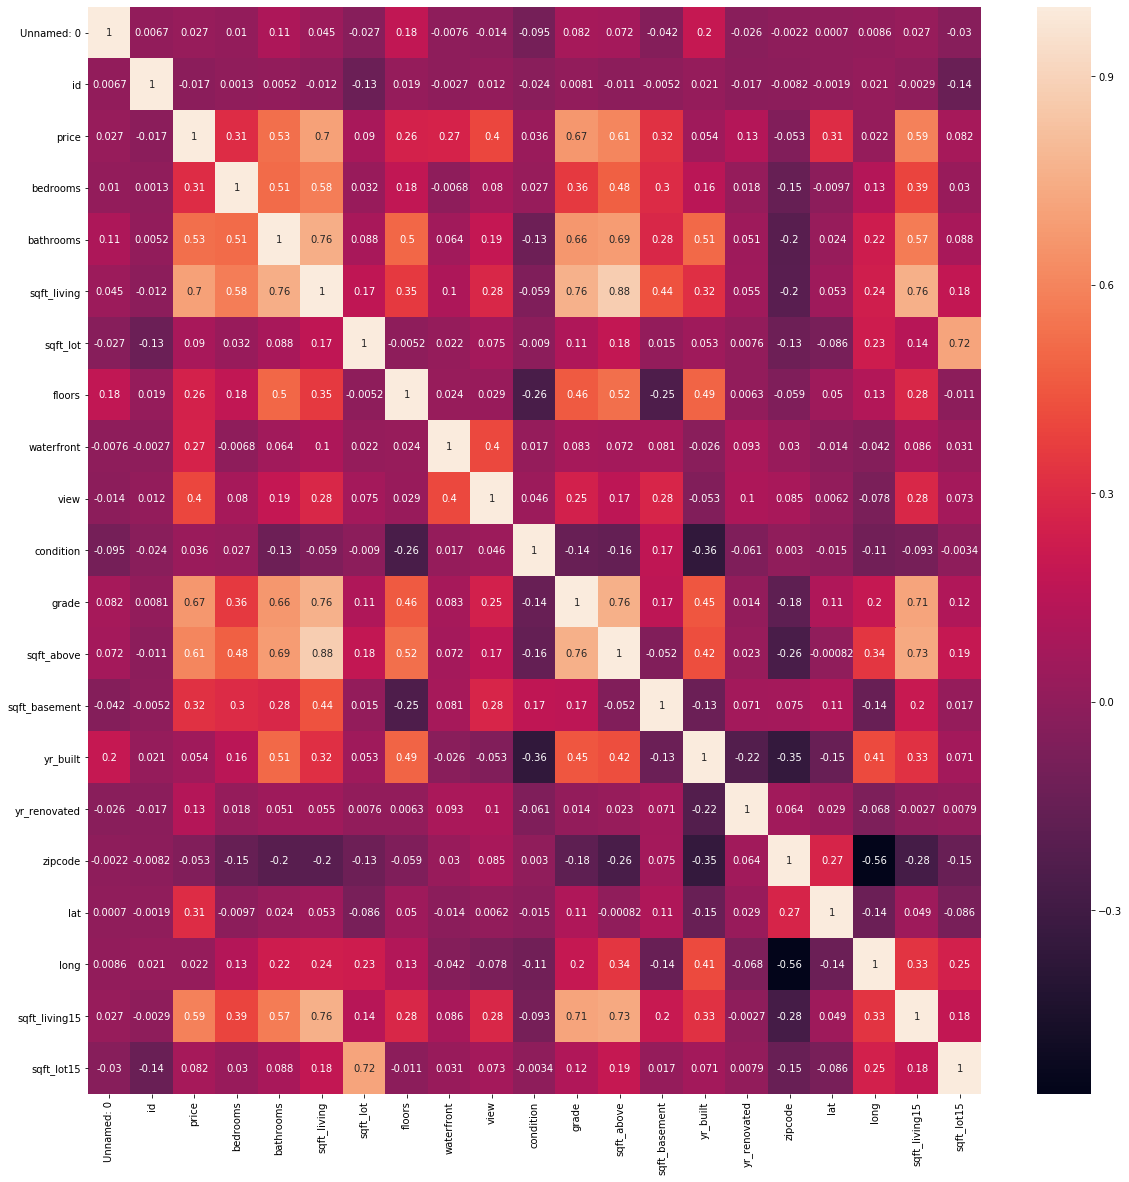

In [90]:
correlations=df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
#the more lighter the color,the more correlated .
#sqft_living,bathrooms,grade,sqft_above,sqft_living15 are correlated with the price

In [92]:
#Another way to show the most correlated features with the price
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
Unnamed: 0       0.027372
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [166]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [167]:
df['date'] = pd.to_datetime(df['date'])
df['date'].dtypes

dtype('<M8[ns]')

In [170]:
df['Month']=pd.DatetimeIndex(df['date']).month
df['Year']=pd.DatetimeIndex(df['date']).year
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Month,Year
0,2014-10-13,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
21609,2015-02-23,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
21610,2014-06-23,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014
21611,2015-01-16,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,1,2015


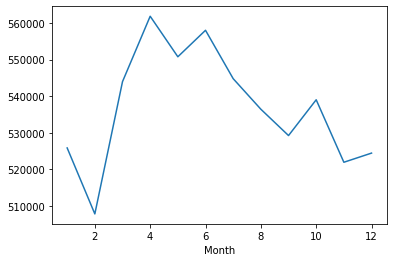

In [175]:
df.groupby('Month').mean()['price'].plot()

In [179]:
df.groupby('Year').mean()['price']

Year
2014    539181.428415
2015    541988.992264
Name: price, dtype: float64

## Model Development

In [180]:
from sklearn.linear_model import LinearRegression


### Simple Linear Regression

In [94]:
#we'll fit the model with the feature long to predict the price:
X = df[['long']]
y = df['price']
lr = LinearRegression()
lr.fit(X,y)
lr.score(X, y)

0.00046769430149007363

In [130]:
#let's see with the most correlated feature with the price
y = df['price']
X = df[['sqft_living']]
lr.fit(X, y)
lr.score(X,y)


0.49285321790379316

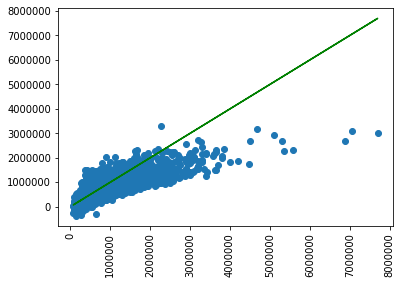

In [184]:
yhat=lr.predict(X)
plt.scatter(y,yhat)
plt.xticks(rotation=90)
plt.plot(y,y,'g')
plt.show()

### Multiple Linear Regression

In [154]:
#MLR with top(5)correlated features with the price:
from sklearn.model_selection import cross_val_score

list=df[["bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
scores=cross_val_score(lr,list,y,cv=10)
print("Cross-validation scores:",scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.51330463 0.54159633 0.52212015 0.54939941 0.50035159 0.55657666
 0.55662635 0.55163179 0.54853337 0.56001211]
Average cross-validation score: 0.54


Cross-validation scores: [0.66147442 0.65454054 0.63324034 0.64984016 0.62692955 0.65556971
 0.65887278 0.65993076 0.65577443 0.6820055 ]
Average cross-validation score: 0.65


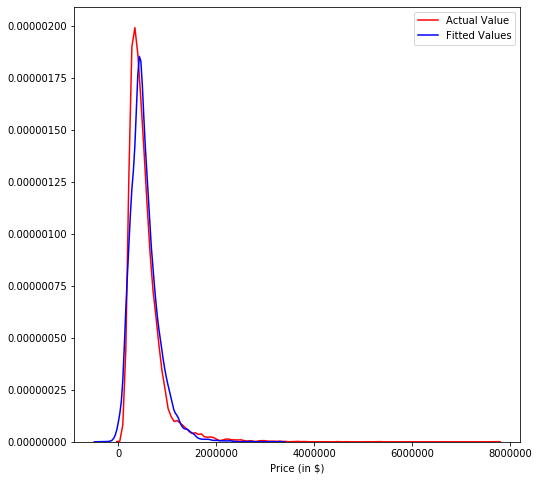

In [194]:
#now we'll fit the model with all features except date and price to predict the price:

features_list =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]  
scores=cross_val_score(lr,features_list,y,cv=10)
print("Cross-validation scores:",scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))

plt.figure(figsize=(8, 8))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(lr.predict(features_list), hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.xlabel('Price (in $)')
plt.show()


### Pipeline

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [122]:
#we'll create a pipeline object that scales the data performs a polynomial transform and fits a linear regression model

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [137]:
pipe.fit(df[['long']],df['price'])
pipe.score(df[['long']],df['price'])

0.0033607985166381744

In [134]:
pipe.fit(features_list,df['price'])
yhat_pipe=pipe.predict(features_list)
pipe.score(features_list,df['price'])

0.7513404614351351

## Model Evaluation and Refinement

### Ridge Regression

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge


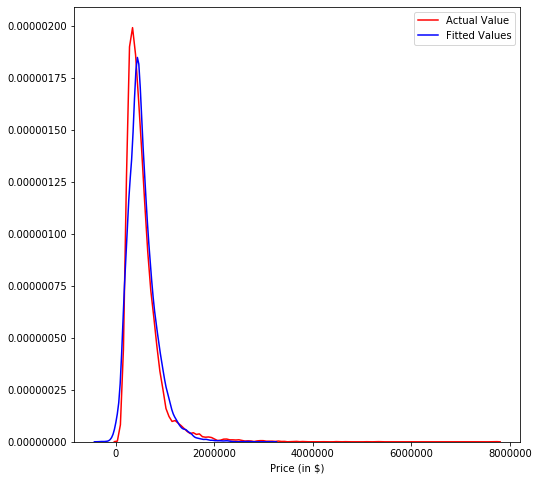

In [196]:
#we'll create and fit ridge regression using the training data and use 0.1 as the regularization parameter
X=features_list
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
Rm=Ridge(alpha=0.1)
Rm.fit(x_train,y_train)
Rm.score(x_test,y_test)
plt.figure(figsize=(8, 8))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Rm.predict(x_train), hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.xlabel('Price (in $)')
plt.show()

In [147]:
#we'll perform some i order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, setting the regularisation parameter to 0.1
Rsquare=[]
order=[0,1,2,3]
for i in order:
   pf=PolynomialFeatures(degree=i)
   x_train_pf = pf.fit_transform(x_train)
   x_test_pf = pf.fit_transform(x_test)
   rm=Ridge(alpha=0.1)
   rm.fit(x_train_pf, y_train)
   Rsquare.append(rm.score(x_test_pf, y_test))

In [150]:
for i,j in zip(order,Rsquare):
    print("Order:",i,"Rsquare","[",i,"]",j)

Order: 0 Rsquare [ 0 ] -0.00025890082835999806
Order: 1 Rsquare [ 1 ] 0.6478759163939135
Order: 2 Rsquare [ 2 ] 0.7002744265869922
Order: 3 Rsquare [ 3 ] 0.48892894399223996


[02:31:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7596596254337156


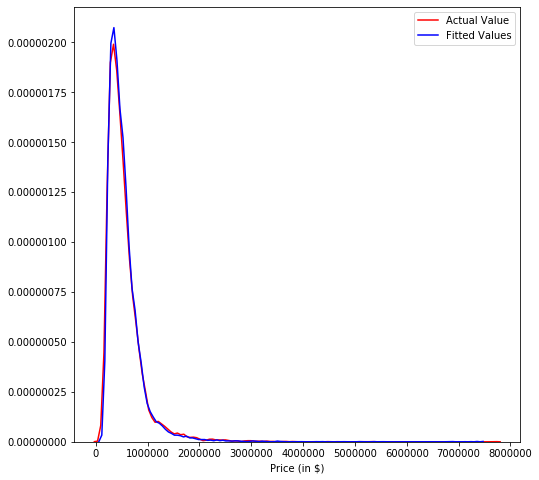

In [197]:
#the best model is the 2nd order polynomial regression with R^2=0.7
#let's try XGBoost:
from sklearn.metrics import explained_variance_score
import xgboost

xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb.fit(x_train, y_train)
print(explained_variance_score(xgb.predict(x_test),y_test))
plt.figure(figsize=(8, 8))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(xgb.predict(x_train), hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.xlabel('Price (in $)')
plt.show()